In [26]:
import os
import pandas as pd
import numpy as np
BASE_DIR = os.path.dirname(os.path.abspath("/home/yildirir/workspace/votenet/README.md"))
ROOT_DIR = BASE_DIR
sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, 'scannet'))
print(sys.path)
from scannet.model_util_scannet import ScannetDatasetConfig
DC = ScannetDatasetConfig()

DATASET_DIR = "/mnt/canis/Datasets/ScanNet/"


FILE_LIST_HARD = "/home/yildirir/workspace/votenet/selected_ratio_120_961.txt"
FILE_LIST_EASY = "/home/yildirir/workspace/votenet/easiest_ones.txt"
FILE_LIST_VAL = "/home/yildirir/workspace/votenet/scannet/meta_data/scannetv2_val.txt"
FILE_LIST_INITAL = "/home/yildirir/workspace/votenet/initial_120.txt"



['/home/yildirir/workspace/votenet/notebooks', '/home/yildirir/.vscode-server/extensions/ms-toolsai.jupyter-2021.8.2041215044/pythonFiles', '/home/yildirir/.vscode-server/extensions/ms-toolsai.jupyter-2021.8.2041215044/pythonFiles/lib/python', '/home/yildirir/anaconda3/envs/GR/lib/python37.zip', '/home/yildirir/anaconda3/envs/GR/lib/python3.7', '/home/yildirir/anaconda3/envs/GR/lib/python3.7/lib-dynload', '', '/home/yildirir/anaconda3/envs/GR/lib/python3.7/site-packages', '/home/yildirir/anaconda3/envs/GR/lib/python3.7/site-packages/pointnet2-0.0.0-py3.7-linux-x86_64.egg', '/home/yildirir/anaconda3/envs/GR/lib/python3.7/site-packages/IPython/extensions', '/home/yildirir/.ipython', '/home/yildirir/workspace', '/home/yildirir/workspace/scannet', '/home/yildirir', '/home/yildirir/scannet', '/home/yildirir', '/home/yildirir/scannet', '/home/yildirir', '/home/yildirir/scannet', '/home/yildirir', '/home/yildirir/scannet', '/home/yildirir/workspace', '/home/yildirir/workspace/scannet', '/home

In [9]:
def parsetxt(s):
    f2 = open(os.path.join(DATASET_DIR,"scans",s,s + ".txt"),"r")
    scenetype = None
    for line in f2:
        if line.split()[0] != "sceneType":
            continue 
        
        
        scenetype = line[12:-1]
    return scenetype

def get_category(FILE_LIST,header_name=None):
    f = open(FILE_LIST,"r")

    scenes,entropies = zip(*[(p.split()[0],float(p.split()[1]))  for p in f])
    

    scene_dict = {}
    for s,e in zip(scenes,entropies):
        scene_class = parsetxt(s)
        if scene_class in scene_dict.keys():
            scene_dict[scene_class][0] += 1
            scene_dict[scene_class][1] += e
        else:
            scene_dict[scene_class] = [1,e]

    df = pd.DataFrame.from_dict(scene_dict,orient="index",columns=[header_name,"Entropy"])
    df["Entropy per scene"] = df["Entropy"]/df[header_name]
    return df

In [10]:
get_category(FILE_LIST_HARD,"HARD").sort_values(by="HARD",ascending=False)

FileNotFoundError: [Errno 2] No such file or directory: '/home/yildirir/workspace/votenet/selected_ratio_120_961.txt'

In [ ]:
get_category(FILE_LIST_EASY,"EASY").sort_values(by="EASY",ascending=False)

,EASY,Entropy,Entropy per scene
Living room / Lounge,38,1671.199980,43.978947
Conference Room,33,1435.558722,43.501779
Lobby,11,463.341725,42.121975
Bookstore / Library,11,458.997662,41.727060
Bedroom / Hotel,9,431.122061,47.902451
Bathroom,6,279.493049,46.582175
Classroom,5,222.602485,44.520497
Office,4,195.550030,48.887507
Misc.,3,146.603164,48.867721
Hallway,2,93.808610,46.904305


In [12]:
FILE_LIST = "/home/yildirir/workspace/votenet/selected_ratio_120_961.txt"
DATA_FOLDER = "/home/yildirir/workspace/votenet/scannet/scannet_train_detection_data/"
mydict = {'cabinet':0, 'bed':1, 'chair':2, 'sofa':3, 'table':4, 'door':5,
            'window':6,'bookshelf':7,'picture':8, 'counter':9, 'desk':10, 'curtain':11,
            'refrigerator':12, 'showercurtrain':13, 'toilet':14, 'sink':15, 'bathtub':16, 'garbagebin':17} 
revDict = {}
NUM_CLASSES = 18
for a in mydict.keys():

    revDict[mydict[a]] = a

def get_class_dist_in_scenes(FILE_LIST):
    f = open(FILE_LIST,"r")

    scenes = [p.split()[0]  for p in f]
    boxes = [np.load(os.path.join(DATA_FOLDER,s + "_bbox.npy"))[:,-1] for s in scenes]
    retDict = {}
    for i in range(NUM_CLASSES):
        retDict[revDict[i]] = 0
    for idx,bs in enumerate(boxes):
        classes = [np.where(DC.nyu40ids == x)[0][0] for x in bs ]
        for c in classes:
            retDict[revDict[c]]+=1
    return pd.DataFrame.from_dict(retDict,orient="index",columns=["Count"])
    


<AxesSubplot:>

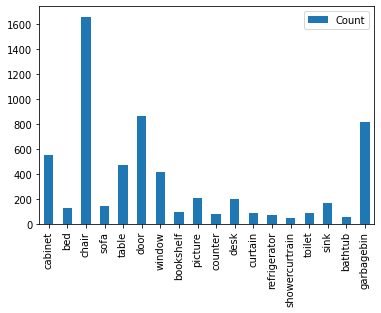

In [16]:
PATH = "../splits/train_0_480.txt"
# get_category(PATH,"tr").sort_values(by="tr",ascending=False)

get_class_dist_in_scenes(PATH).plot.bar()

<AxesSubplot:>

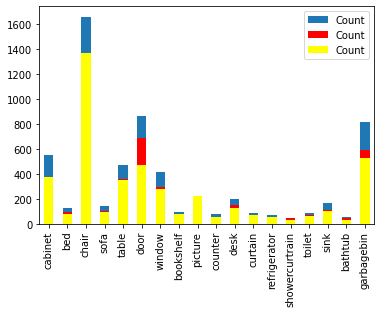

In [28]:
# PATH_UNC = "../uncertainty_splits/accumulating_0.txt"
# get_class_dist_in_scenes(PATH_UNC).plot.bar()
PATH = "../splits/train_0_480.txt"
PATH2 = "../splits/train_0_360.txt"
# get_category(PATH,"tr").sort_values(by="tr",ascending=False)

ax = get_class_dist_in_scenes(PATH).plot.bar()
get_class_dist_in_scenes(PATH2).plot.bar(color="r",ax=ax)
get_class_dist_in_scenes(FILE_LIST_VAL).plot.bar(ax=ax,color="yellow")

<AxesSubplot:>

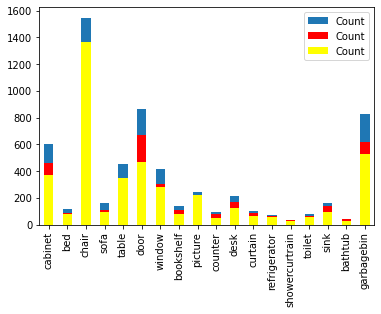

In [29]:
UPATH = "../uncertainty_splits/accumulating_0_480.txt"
UPATH2 = "../uncertainty_splits/accumulating_0_360.txt"
# get_category(PATH,"tr").sort_values(by="tr",ascending=False)

ax2 = get_class_dist_in_scenes(UPATH).plot.bar()
get_class_dist_in_scenes(UPATH2).plot.bar(color="r",ax=ax2)
get_class_dist_in_scenes(FILE_LIST_VAL).plot.bar(ax=ax2,color="yellow")

<AxesSubplot:>

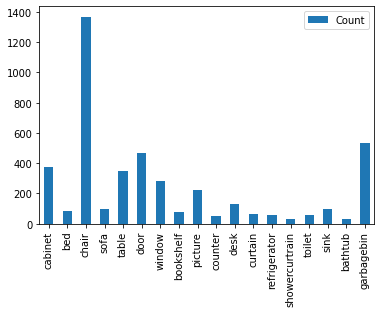

In [ ]:
get_class_dist_in_scenes(FILE_LIST_VAL).plot.bar()

In [5]:
import pandas as pd
import numpy as np
files = list(pd.read_csv("/home/yildirir/workspace/votenet/splits_3/rando_2.txt",header=None).values[:,0])

In [6]:
ratios = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
num_scenes = len(files)
inds = np.array(np.floor(ratios*num_scenes),dtype=np.int)
splits = []
for idx,i in enumerate(inds):
    elems = files[:i]
    with open("../splits_3/train_0_{}.txt".format(i),"w") as f:
        for e in elems:
            f.write(e + "\n")
